# Random Forest

Random Forest is a `supervised learning algorithm`. Like you can already see from it’s name, it creates a forest and makes it somehow random. `The „forest“ it builds, is an ensemble of Decision Trees`, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

## Classification Example

In [89]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
# import the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


accuracy score:  1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



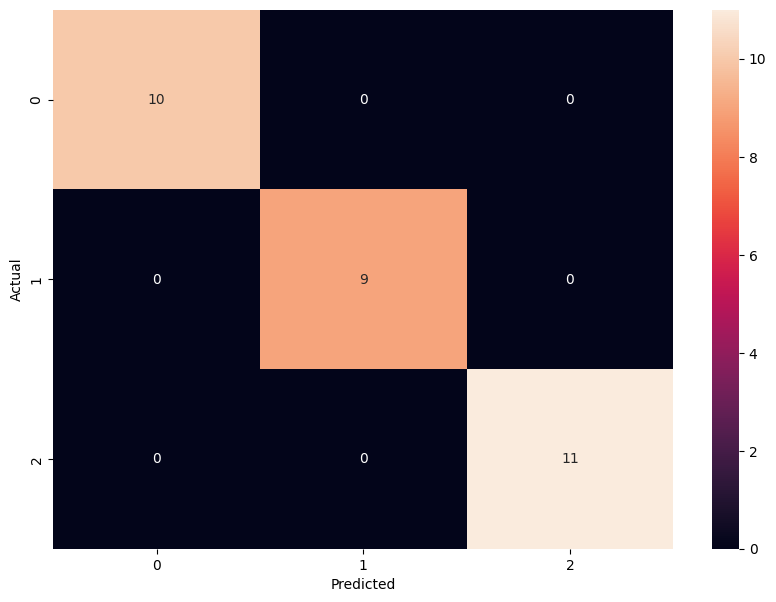

In [91]:
# separate X and y
X = df.drop('species', axis=1)
y = df['species']
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# call the model
model = RandomForestClassifier()
# train the model
model.fit(X_train, y_train)
# prediction
y_pred = model.predict(X_test)
#evaluate the model
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

# visualize the model
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Regression Example

In [92]:
# import the libraries
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [93]:
# load the dataset
# import the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
# encode features which are categorical or object using for loop
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
# Separate X and y
X = df.drop('sepal_length', axis=1)
y = df['sepal_length']
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# call the model
model = RandomForestRegressor(n_estimators=200, random_state=42)
# train the model
model.fit(X_train, y_train)
# prediction
y_pred = model.predict(X_test)
# evaluate the model
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))


mean squared error:  0.09520364174914937
mean absolute error:  0.2542834920634926
r2 score:  0.8620770111804867
root mean squared error:  0.3085508738427901
